In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Attribute Information:
1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal, goal field!)

In [2]:
##  read the file
df=pd.read_excel("Train.xlsx")
df1=pd.read_excel("Test.xlsx")
df.shape,df1.shape

((811, 7), (150, 7))

In [3]:
## To overview the data
df.sample(5)

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
788,789,4.0,67.0,irregular,ill-defined,low,1
270,271,5.0,67.0,irregular,ill-defined,low,1
214,215,5.0,76.0,irregular,spiculated,low,1
147,148,4.0,63.0,irregular,NaN,low,1
84,85,5.0,51.0,irregular,NaN,NaN,1


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.reset_index(drop=True,inplace=True)
df.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1


In [6]:
df1.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5,65.0,lobular,ill-defined,low,1
1,2,5,74.0,lobular,microlobulated,low,1
2,3,4,NaN,oval,circumscribed,low,0
3,4,4,57.0,irregular,ill-defined,fat-containing,1
4,5,4,76.0,lobular,microlobulated,low,0


In [7]:
df.drop("Index",axis=1,inplace=True)
index=df1["Index"]
df1.drop("Index",axis=1,inplace=True)


In [8]:
df.keys()


Index(['BI_RADS', 'Age', 'Shape', 'Margin', 'Mass_Density', 'Severity'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           723 non-null    float64
 2   Shape         781 non-null    object 
 3   Margin        764 non-null    object 
 4   Mass_Density  735 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 38.1+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI_RADS,809.0,4.379481,1.914800,0.0,4.0,4.0,5.0,55.0
Age,723.0,55.887967,16.886616,5.0,45.0,56.0,66.0,130.0
Severity,811.0,0.459926,0.498699,0.0,0.0,0.0,1.0,1.0


In [11]:
## to check the missing value
df.isnull().sum()

BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

In [12]:
df.rename(columns={"BI_RADS":"Bi_Rads"},inplace=True)
df1.rename(columns={"BI_RADS":"Bi_Rads"},inplace=True)

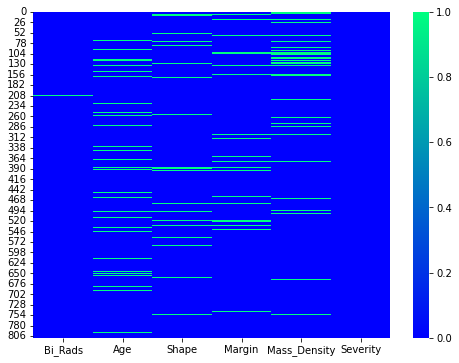

In [13]:
##EDA
## visualize the missing value
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap="winter")
plt.show()

0    438
1    373
Name: Severity, dtype: int64


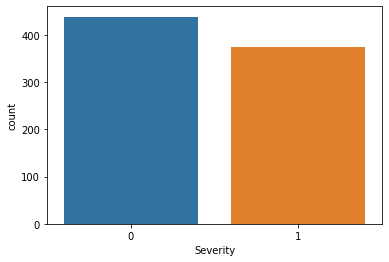

In [14]:
## to check the data is balanced or imbalanced
sns.countplot(x="Severity",data=df)
print(df["Severity"].value_counts())
# Data is well balanced [benign=0 or malignant=1]

irregular    340
round        192
oval         177
lobular       72
Name: Shape, dtype: int64

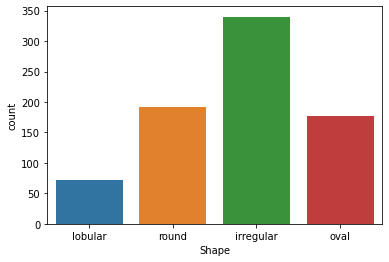

In [15]:
## visualizing the categorical column
sns.countplot(x="Shape",data=df)
df["Shape"].value_counts()

<AxesSubplot:xlabel='Margin', ylabel='count'>

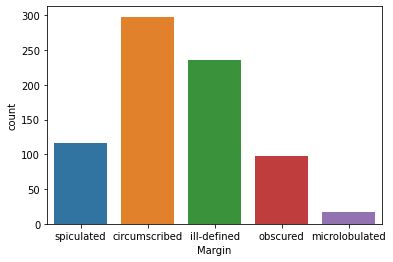

In [16]:
sns.countplot(x="Margin",data=df)

<AxesSubplot:xlabel='Mass_Density', ylabel='count'>

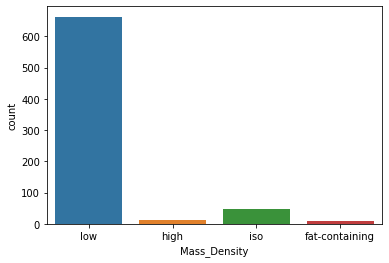

In [17]:
sns.countplot(x="Mass_Density",data=df)

<AxesSubplot:xlabel='Mass_Density', ylabel='count'>

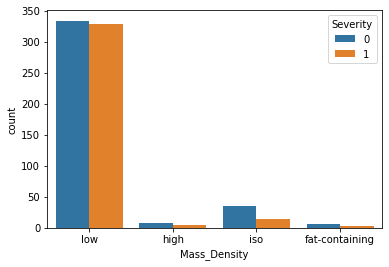

In [18]:
## Categorical variable Mass_Density w.r.t to target column
sns.countplot(x="Mass_Density",data=df,hue="Severity")

<AxesSubplot:xlabel='Margin', ylabel='count'>

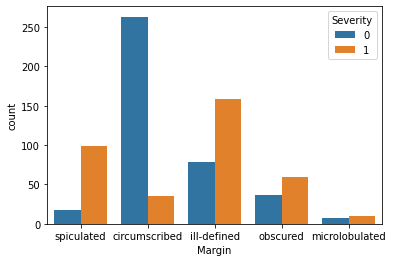

In [19]:
## Categorical variable Margin w.r.t to target column
sns.countplot(x="Margin",data=df,hue="Severity")

<AxesSubplot:xlabel='Shape', ylabel='count'>

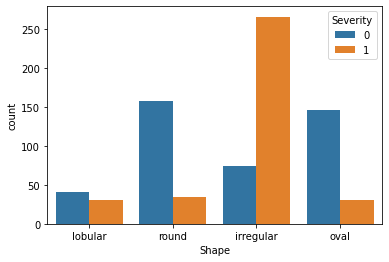

In [20]:
## Categorical variable Shape w.r.t to target column
sns.countplot(x="Shape",data=df,hue="Severity")

In [21]:
pd.crosstab(df['Shape'], df['Severity'])

Severity,0,1
Shape,,
irregular,74,266
lobular,41,31
oval,146,31
round,158,34


In [22]:
pd.crosstab(df['Mass_Density'], df['Severity'])

Severity,0,1
Mass_Density,,
fat-containing,7,3
high,8,5
iso,35,14
low,334,329


In [23]:
pd.crosstab(df['Margin'], df['Severity'])

Severity,0,1
Margin,,
circumscribed,263,35
ill-defined,78,158
microlobulated,7,10
obscured,37,60
spiculated,17,99


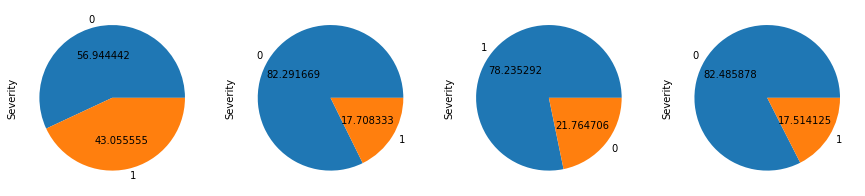

In [24]:
plt.figure(figsize=(15,20))
plt.subplot(1,4,1)
df[df.Shape=="lobular"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,2)
df[df.Shape=="round"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,3)
df[df.Shape=="irregular"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,4)
df[df.Shape=="oval"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.show()


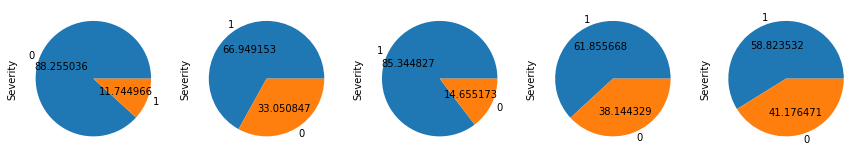

In [25]:
plt.figure(figsize=(15,20))
plt.subplot(1,5,1)
df[df.Margin=="circumscribed"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,5,2)
df[df.Margin=="ill-defined"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,5,3)
df[df.Margin=="spiculated"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,5,4)
df[df.Margin=="obscured"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,5,5)
df[df.Margin=="microlobulated"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.show()

## Note:

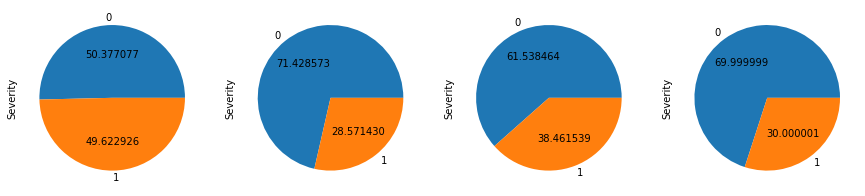

In [26]:
plt.figure(figsize=(15,20))
plt.subplot(1,4,1)
df[df.Mass_Density=="low"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,2)
df[df.Mass_Density=="iso"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,3)
df[df.Mass_Density=="high"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.subplot(1,4,4)
df[df.Mass_Density=="fat-containing"].Severity.value_counts().plot(kind="pie",autopct="%2f")
plt.show()

<AxesSubplot:>

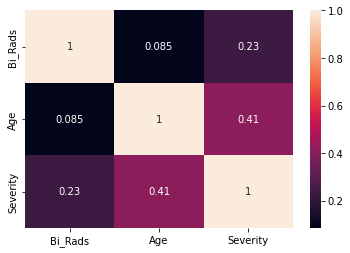

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
## Create bins to visualize the data.
df["age_group"]=pd.cut(x=df["Age"],bins=[0,20,40,60,80,100,120,140])

'           Total  benign  maligant\n(40, 60]      397     241    156\n(60, 80]      305     100    205\n(20, 40]      121     105    16\n(80, 100]     14      1      13\n(0, 20]       12      11     1\n(120, 140]    12      2      10\n(100, 120]    0       0      0\n\n'

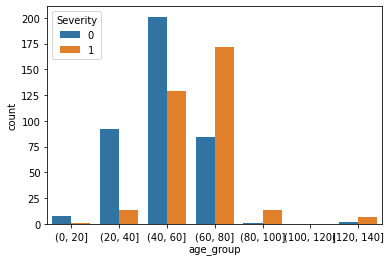

In [29]:
sns.countplot(x="age_group",data=df,hue="Severity")

"""           Total  benign  maligant
(40, 60]      397     241    156
(60, 80]      305     100    205
(20, 40]      121     105    16
(80, 100]     14      1      13
(0, 20]       12      11     1
(120, 140]    12      2      10
(100, 120]    0       0      0

""" 


In [30]:
pd.crosstab(df['age_group'], df['Severity'])

Severity,0,1
age_group,,
"(0, 20]",8,1
"(20, 40]",92,13
"(40, 60]",201,129
"(60, 80]",84,172
"(80, 100]",1,13
"(120, 140]",2,7


In [31]:
df["age_group"].value_counts()

(40, 60]      330
(60, 80]      256
(20, 40]      105
(80, 100]      14
(0, 20]         9
(120, 140]      9
(100, 120]      0
Name: age_group, dtype: int64

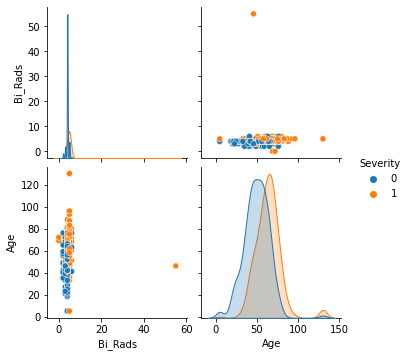

In [32]:
sns.pairplot(df,hue="Severity")
## from the below graph we oberved that 
# 1) age group of people having more severity maligant in between 60-100 is more as compare to other age group
# 2) if the bi_rads is higher  than more likly to be severity is maligant.

<AxesSubplot:xlabel='Age', ylabel='Count'>

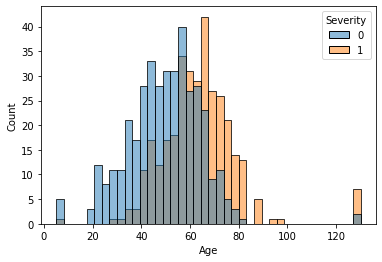

In [33]:
sns.histplot(x="Age",bins=40,hue="Severity",data=df)

<AxesSubplot:xlabel='Bi_Rads', ylabel='Count'>

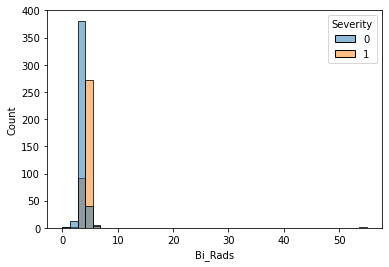

In [34]:
sns.histplot(x="Bi_Rads",bins=40,hue="Severity",data=df)

<AxesSubplot:>

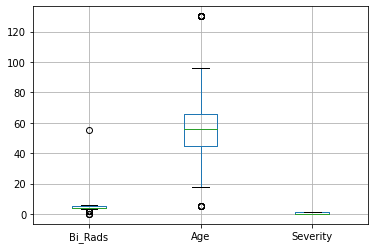

In [35]:
## to check the outlier
df.boxplot()

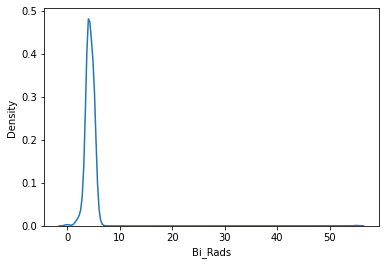

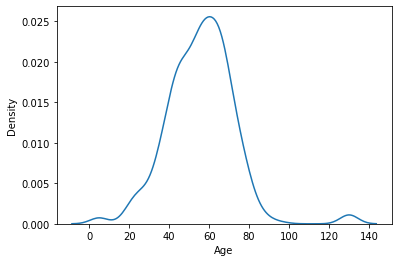

(0.6345145802814919, 22.846786785496114)

In [36]:
## 6) Determine whether the data is normally distributed visually and statistically.
## to check the distribution
for i in df.keys():
    if df[i].dtype=="float64":
        sns.distplot(df[i],hist=False,)
        plt.show()

df["Age"].skew(),df["Bi_Rads"].skew()

In [37]:
df["Bi_Rads"].nunique()

7

In [38]:
## to check the unique value
for i in df.keys():
    if df[i].size>50:
        print(i,df[i].unique()[:5])

Bi_Rads [ 5.  4.  3. nan  2.]
Age [67. 43. 58. 28. 74.]
Shape ['lobular' 'round' 'irregular' nan 'oval']
Margin ['spiculated' 'circumscribed' nan 'ill-defined' 'obscured']
Mass_Density ['low' nan 'high' 'iso' 'fat-containing']
Severity [1 0]
age_group [(60.0, 80.0], (40.0, 60.0], (20.0, 40.0], NaN, (80.0, 100.0]]
Categories (7, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100] < (100, 120] < (120, 140]]


## Comment on EDA of variables in data.
## EDA observation
### categorical column & numerical column

## Uni-variate analysis 
- count of irregular is more as compare to other Shape.
- count of circumscribed is more as compare to other Margin
- count of low is higher as compare to  other Mass_Density
- count of age_group is involved more people age in between 40-80  years.

## Bi-variate analysis
-  if Shape irrgeular having more likly to severity is maligant, out of 100% there is  78% are maligant and so on.
-  if the Margin spiculated having more likly to severity is maligant,out of 100% there is 85% are maligant and so on
-  if the Mass_Density is low having more likly to be Severity is maligant out of 100% there is 49% are maligant and so on
-  people having  age group of 60-80 and 80-100 having more likly to be Severity is maligant.
-  Numercal column are not correlated to each other
-  if Bi_Rads asssetemnt more than 5 having more likly to be Severity is maligant.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [40]:
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [41]:
##outlier removal and capping
##IQR method
def quantile(data,col):
    q75,q25=data[col].quantile(0.75),data[col].quantile(0.25)
    IQR=q75-q25
    upper_limit=q75+1.5*IQR
    lower_limit=q25-1.5*IQR
    return upper_limit,lower_limit

In [42]:
def outlier_capping(upper_limit,lower_limit,col,data):
    data.loc[data[col]>upper_limit,"Age"]=upper_limit
    data.loc[data[col]<lower_limit,"Age"]=lower_limit
    return "done"

In [43]:
#for train data
quantile(df,"Age")

(97.5, 13.5)

In [44]:
outlier_capping(97.5,13.5,"Age",df)

'done'

In [45]:
quantile(df,"Bi_Rads")

(6.5, 2.5)

In [46]:
outlier_capping(6.5,2.5,"Bi_Rads",df)

'done'

In [47]:
#for test data
#for Age col
quantile(df1,"Age")


(95.0, 15.0)

In [48]:
outlier_capping(95,15,"Age",df1)

'done'

In [49]:
# # for Bi_Rads
quantile(df1,"Bi_Rads")

(4.0, 4.0)

In [50]:
outlier_capping(4,4,"Bi_Rads",df1)

'done'

In [51]:
#### To fill the missing value
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


In [52]:
df.isnull().sum()

Bi_Rads          2
Age             87
Shape           30
Margin          47
Mass_Density    76
Severity         0
age_group       88
dtype: int64

In [53]:
df1.isnull().sum()

Bi_Rads         0
Age             9
Shape           1
Margin          1
Mass_Density    0
Severity        0
dtype: int64

In [54]:

knn=KNNImputer(n_neighbors=3,weights="distance")
Simple_Shape=SimpleImputer(strategy="most_frequent")
Simple_Margin=SimpleImputer(strategy="most_frequent")
Simple_Mass_Density=SimpleImputer(strategy="most_frequent")
Simple_Bi_Rads=SimpleImputer(strategy="median")

In [55]:
df["Shape"]=Simple_Shape.fit_transform(df[["Shape"]])
df["Margin"]=Simple_Margin.fit_transform(df[["Margin"]])
df["Mass_Density"]=Simple_Mass_Density.fit_transform(df[["Mass_Density"]])
df["Bi_Rads"]=Simple_Bi_Rads.fit_transform(df[["Bi_Rads"]])
df["Age"]=knn.fit_transform(df[["Age"]])

In [56]:
df1["Shape"]=Simple_Shape.transform(df1[["Shape"]])
df1["Margin"]=Simple_Margin.transform(df1[["Margin"]])
df1["Mass_Density"]=Simple_Mass_Density.transform(df1[["Mass_Density"]])
df1["Bi_Rads"]=Simple_Bi_Rads.transform(df1[["Bi_Rads"]])
df1["Age"]=knn.transform(df1[["Age"]])

In [57]:
df.isnull().sum(),df1.isnull().sum()

(Bi_Rads          0
 Age              0
 Shape            0
 Margin           0
 Mass_Density     0
 Severity         0
 age_group       88
 dtype: int64,
 Bi_Rads         0
 Age             0
 Shape           0
 Margin          0
 Mass_Density    0
 Severity        0
 dtype: int64)

In [58]:
## encoding for ordinal categories
df["Mass_Density"].replace({"high":1,"iso":2,"low":3,"fat-containing":4},inplace=True)
df1["Mass_Density"].replace({"high":1,"iso":2,"low":3,"fat-containing":4},inplace=True)

In [59]:
## for nominal categories
df=pd.get_dummies(data=df,columns=["Shape","Margin"],drop_first=True)
df1=pd.get_dummies(data=df1,columns=["Shape","Margin"],drop_first=True)

In [60]:
X=df.drop(["Severity","age_group"],axis=1)
y=df["Severity"]
X.shape,y.shape

((811, 10), (811,))

In [61]:
X.isnull().sum()

Bi_Rads                  0
Age                      0
Mass_Density             0
Shape_lobular            0
Shape_oval               0
Shape_round              0
Margin_ill-defined       0
Margin_microlobulated    0
Margin_obscured          0
Margin_spiculated        0
dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
log_claf=LogisticRegression()

In [63]:
# for i in range(1,50):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
#     X_train_scale=std.fit_transform(X_train)
#     X_test_scale=std.transform(X_test)
#     log_claf.fit(X_train_scale,y_train)
#     pred=log_claf.predict(X_test_scale)
#     accuracy=accuracy_score(y_test,pred)
#     print("train acc and test acc is",i,log_claf.score(X_train_scale,y_train),accuracy) 
    
    

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=29,stratify=y)
X_train_scale=std.fit_transform(X_train)
X_test_scale=std.transform(X_test)

In [65]:
cross_val_score(log_claf,X_train_scale,y_train,scoring="accuracy",cv=3)

array([0.81018519, 0.82407407, 0.81481481])

In [66]:
log_claf=LogisticRegression()
log_claf.fit(X_train_scale,y_train)
log_claf.score(X_train_scale,y_train)

0.8179012345679012

In [67]:
pred=log_claf.predict(X_test_scale)
accuracy_score(y_test,pred)

0.8650306748466258

In [68]:
grid={
    "C":[0.001,0.01,0.1,1],
    "solver":["newton-cg","lbfgs","liblinear","sag","saga"]
}

GS=GridSearchCV(log_claf,grid,verbose=3,cv=3,scoring="accuracy")
GS.fit(X_train_scale,y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .........C=0.001, solver=newton-cg;, score=0.722 total time=   0.0s
[CV 2/3] END .........C=0.001, solver=newton-cg;, score=0.657 total time=   0.0s
[CV 3/3] END .........C=0.001, solver=newton-cg;, score=0.676 total time=   0.0s
[CV 1/3] END .............C=0.001, solver=lbfgs;, score=0.722 total time=   0.0s
[CV 2/3] END .............C=0.001, solver=lbfgs;, score=0.657 total time=   0.0s
[CV 3/3] END .............C=0.001, solver=lbfgs;, score=0.676 total time=   0.0s
[CV 1/3] END .........C=0.001, solver=liblinear;, score=0.769 total time=   0.0s
[CV 2/3] END .........C=0.001, solver=liblinear;, score=0.792 total time=   0.0s
[CV 3/3] END .........C=0.001, solver=liblinear;, score=0.787 total time=   0.0s
[CV 1/3] END ...............C=0.001, solver=sag;, score=0.722 total time=   0.0s
[CV 2/3] END ...............C=0.001, solver=sag;, score=0.657 total time=   0.0s
[CV 3/3] END ...............C=0.001, solver=sag;

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [69]:
GS.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [70]:
model=LogisticRegression(class_weight="balanced",penalty="l2",solver='newton-cg',C=1 )

In [71]:
model.fit(X_train_scale,y_train)
model.score(X_train_scale,y_train)

0.8209876543209876

In [72]:
pred=model.predict(X_test_scale)
accuracy_score(y_test,pred)

0.8650306748466258

<AxesSubplot:>

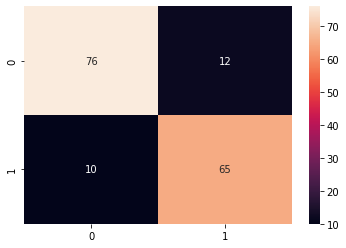

In [73]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [74]:
# test data
y_final=df1.drop("Severity",axis=1)
y_org=df1["Severity"]

In [75]:
y_final_scale=std.fit_transform(y_final)
y_final_pred=model.predict(y_final_scale)
log_acc=accuracy_score(y_org,y_final_pred)

In [76]:
precision_score(y_org,y_final_pred),recall_score(y_org,y_final_pred)


(0.821917808219178, 0.8333333333333334)

<AxesSubplot:>

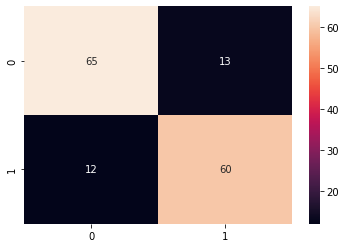

In [77]:
sns.heatmap(confusion_matrix(y_org,y_final_pred),annot=True)

In [78]:
from sklearn.svm import SVC


In [79]:
svm=SVC()

In [80]:
cross_val_score(svm,X_train_scale,y_train,scoring="accuracy",cv=3)

array([0.77777778, 0.80092593, 0.77314815])

In [81]:
svm_claf=SVC()
svm_claf.fit(X_train_scale,y_train)
svm_claf.score(X_train_scale,y_train)

0.8256172839506173

In [82]:
pred=svm_claf.predict(X_test_scale)
accuracy_score(y_test,pred)

0.8588957055214724

In [83]:
grid={
    "C":[0.001,0.01,0.1,1],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
}

GS=GridSearchCV(svm_claf,grid,cv=3,scoring="accuracy")
GS.fit(X_train_scale,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [84]:
GS.best_score_

0.8209876543209877

In [85]:
model_svm=SVC(kernel="linear",C=1 )
model_svm.fit(X_train_scale,y_train)
model_svm.score(X_train_scale,y_train)

0.8209876543209876

In [86]:
pred=model_svm.predict(X_test_scale)
accuracy_score(y_test,pred)

0.8650306748466258

<AxesSubplot:>

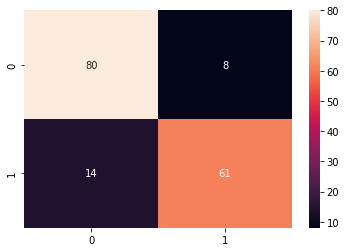

In [87]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [88]:
y_final_pred=model_svm.predict(y_final_scale)
accuracy_score(y_org,y_final_pred)

0.76

<AxesSubplot:>

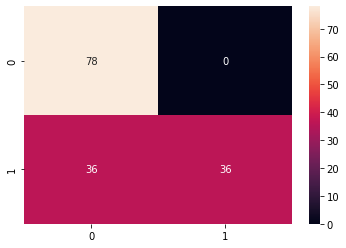

In [89]:
sns.heatmap(confusion_matrix(y_org,y_final_pred),annot=True)

In [90]:
precision_score(y_org,y_final_pred),recall_score(y_org,y_final_pred),f1_score(y_org,y_final_pred)

(1.0, 0.5, 0.6666666666666666)

In [91]:
#### KNN
from sklearn.neighbors import KNeighborsClassifier


In [92]:
knn=KNeighborsClassifier()

In [93]:
cross_val_score(knn,X_train_scale,y_train,scoring="accuracy",cv=5)

array([0.76153846, 0.77692308, 0.83076923, 0.76744186, 0.7751938 ])

In [94]:
knn_claf=KNeighborsClassifier(n_neighbors=5)
knn_claf.fit(X_train_scale,y_train)
knn_claf.score(X_train_scale,y_train)

0.8503086419753086

In [95]:
pred=knn_claf.predict(X_test_scale)
accuracy_score(y_test,pred)

0.8282208588957055

<AxesSubplot:>

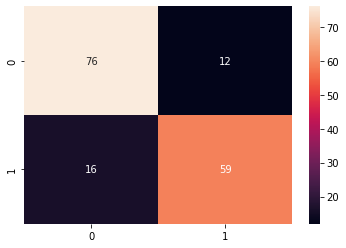

In [96]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [97]:
y_final_pred=knn_claf.predict(y_final_scale)
accuracy_score(y_org,y_final_pred)

0.7

<AxesSubplot:>

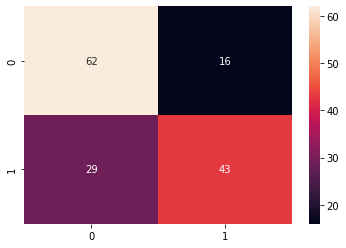

In [98]:
sns.heatmap(confusion_matrix(y_org,y_final_pred),annot=True)

In [99]:
precision_score(y_org,y_final_pred),recall_score(y_org,y_final_pred)

(0.7288135593220338, 0.5972222222222222)

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)

In [101]:
rf.fit(X_train,y_train)
cross_val_score(rf,X_train,y_train,cv=5,scoring="accuracy")

array([0.83846154, 0.76153846, 0.82307692, 0.75968992, 0.75968992])

In [102]:
pred=rf.predict(X_test)
accuracy_score(y_test,pred)

0.852760736196319

In [103]:
# grid={
#     "n_estimators":[100,200],
# # Number of features to consider at every split
# "max_features":['auto', 'sqrt'],
# # Maximum number of levels in tree
# "max_depth":[int(x) for x in np.linspace(5, 30, num = 6)],
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# "min_samples_split":[2, 5, 10, 15, 100],
# # Minimum number of samples required at each leaf node
# "min_samples_leaf":[1, 2, 5, 10]
    
# }

In [104]:
#GS=GridSearchCV(rf,grid,cv=5,scoring="accuracy",n_jobs=-1)

In [105]:
#GS.fit(X_train,y_train)

In [106]:
y_final=rf.predict(y_final)
accuracy_score(y_org,y_final)

0.62

<AxesSubplot:>

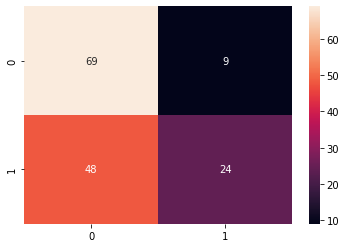

In [107]:
sns.heatmap(confusion_matrix(y_org,y_final),annot=True)

In [108]:
precision_score(y_org,y_final),recall_score(y_org,y_final)

(0.7272727272727273, 0.3333333333333333)

## 1. Build Statistical Classification model to detect severity
### I have try with logistic,svm,knn,random forest i got the better result with logistic regression

## 2. What considerations have been used for model selection?
### performance,Explainability,Complexity,Dataset size,Training time and cost,Dimensionality

## 3. What features would you want to create for your prediction model based on data provided?
### By using Age feature i have created categorical age_group people for getting insight i.e  how many age_group people having  Severity  are maligant and benign which is shown in EDA


## 4. How have you performed hyper-parameter tuning and model optimization? What are the reasons for your decision choices for these steps?
### To reduce the overfitting and under fitting and model is well genralise with unseen data.

## 5. What is your model evaluation criteria? What are the assumptions and limitations of your approach?
### model evaluation criteria is recall is very important in this case limitation is we will not capture the irreducible error in present in the data.

## 6. Determine whether the data is normally distributed visually and statistically.
### data is non normally distributed which u can seen above EDA

## 7. Comment on EDA of variables in data.
### Uni-variate analysis¶
### count of irregular is more as compare to other Shape.
### count of circumscribed is more as compare to other Margin
### count of low is higher as compare to other Mass_Density
### count of age_group is involved more people age in between 40-80 years.

## Bi-variate analysis
### if Shape irrgeular having more likly to severity is maligant, out of 100% there is 78% are maligant and so on.
### if the Margin spiculated having more likly to severity is maligant,out of 100% there is 85% are maligant and so on
### if the Mass_Density is low having more likly to be Severity is maligant out of 100% there is 49% are maligant and so on
### people having age group of 60-80 and 80-100 having more likly to be Severity is maligant.
### Numercal column are not correlated to each other
### if Bi_Rads asssetemnt more than 5 having more likly to be Severity is maligant.

## 8. How are you detecting and treating outliers in the dataset for better convergence?
### first of all by using boxplot and distribution plot i have visualize the outlier after visualizing the by using the IQR method to detect the outlier after detecting the outlier i have also try with transformation technique but i got the better result with imputation outlier with upper and lower limit. 

## 9. What techniques have been used for treating missing values to prepare features for model building?
### for categorical column i have used mode and for numerical column i have used the knn imputer after removing the outlier i have used to fill the missing value  because to avoid the impact of outlier on the data of age column.

## 10. What is the distribution of target with respect to categorical columns?
### already mention in eda categorical column with target column

## 11. Comment on any other observations or recommendations based on your analysis.
### try with other algorthm like Gradient boost XGboost,catboost for better result with feature selection technique.
